<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Predictive_Analytics_for_Market_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

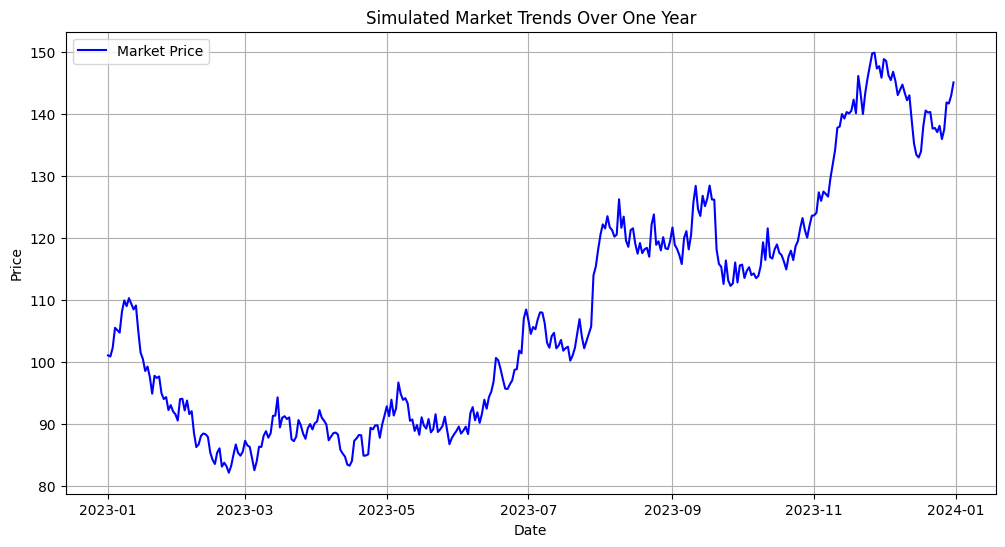

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 612.00


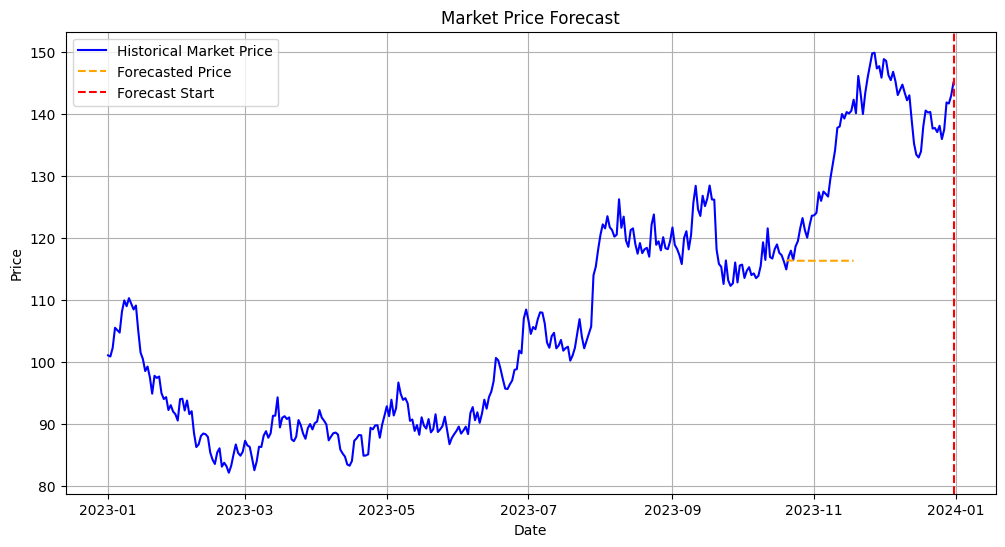

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Step 1: Simulate Historical Market Data
np.random.seed(42)  # For reproducibility

# Simulating a time series for market trends (e.g., stock prices)
num_days = 365  # 1 year of daily data
date_range = pd.date_range(start='2023-01-01', periods=num_days, freq='D')

# Simulating market price using a random walk
initial_price = 100
daily_returns = np.random.normal(loc=0.001, scale=0.02, size=num_days)  # Simulated daily returns
price = initial_price * (1 + daily_returns).cumprod()  # Cumulative product to simulate price

# Create a DataFrame
market_data = pd.DataFrame({'Date': date_range, 'Price': price})
market_data.set_index('Date', inplace=True)

# Step 2: Visualize Historical Market Data
plt.figure(figsize=(12, 6))
plt.plot(market_data.index, market_data['Price'], label='Market Price', color='blue')
plt.title('Simulated Market Trends Over One Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Step 3: Fit an ARIMA Model
# Split the data into training and testing sets
train_size = int(len(market_data) * 0.8)
train, test = market_data.iloc[:train_size], market_data.iloc[train_size:]

# Fit the ARIMA model (order can be adjusted based on analysis)
model = ARIMA(train['Price'], order=(5, 1, 0))  # ARIMA(p,d,q) - Adjust (p,d,q) as necessary
model_fit = model.fit()

# Step 4: Make Predictions
# Forecast the next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Step 5: Evaluate the Model
# Prepare the test set for evaluation
# Use the index of the forecast object directly instead of creating a new one
test_forecast = pd.Series(forecast, index=forecast.index) # Changed line


# Calculate mean squared error
mse = mean_squared_error(test['Price'][-forecast_steps:], test_forecast)
print(f'Mean Squared Error: {mse:.2f}')

# Step 6: Visualize the Forecast
plt.figure(figsize=(12, 6))
plt.plot(market_data.index, market_data['Price'], label='Historical Market Price', color='blue')
plt.plot(test_forecast.index, test_forecast, label='Forecasted Price', color='orange', linestyle='--')
plt.axvline(x=test.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.title('Market Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()
